# EDA

In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np
from sklearn.cluster import DBSCAN

sys.path.append('../utils')
import helpers as h

## Declare notebook constants

In [4]:
ITM_DIR = os.path.join(os.getcwd(), '../data/intermediate')

## Read parsed data

In [61]:
request_df = pd.read_csv(os.path.join(ITM_DIR, 'requests.csv'))
server_df = pd.read_csv(os.path.join(ITM_DIR, 'serverlog.csv'))

## Basic EDA:

In [9]:
request_df.columns

Index(['file_uuid', 'configurationName', 'id', 'lat', 'long', 'start_time',
       'end_time', 'dir', 'route_id', 'route_date', 'idblock_1', 'idblock_2',
       'idblock_3', 'internal_id'],
      dtype='object')

In [62]:
server_df.columns

Index(['Unnamed: 0', 'Date', 'Time', 'OptimizationRequestId', 'RouteId',
       'TriggerType', 'ConfigurationName', 'NumberOfTasks',
       'NumberOfTasksInInputPlan'],
      dtype='object')

In [59]:
server_df

,Unnamed: 0,Date,Time,OptimizationRequestId,RouteId,TriggerType,ConfigurationName,NumberOfTasks,NumberOfTasksInInputPlan
0,0,5/30/2022,1:03:42.341 PM,ded486e8-cdda-49e7-8877-1419c09a6801,shiftId,FullOptimization,CreateSequence,1,0
1,1,5/30/2022,1:10:31.742 PM,58548c16-f60f-41d3-bf5e-b3a4fe1a3c16,0511_A89,TimeCalculation,EstimateTime,20,20
2,2,5/30/2022,1:11:07.500 PM,0fc8aa89-cf38-4a79-9514-d8c2915b3a25,0525_269,AdditionalOrders,AddToSequence,79,42
3,3,5/30/2022,1:12:01.156 PM,a64c4d13-0540-4383-86fa-60243dfd752c,0511_A89,TimeCalculation,EstimateTime,20,20
4,4,5/30/2022,1:18:43.056 PM,eae59070-4864-45d4-93c8-7985c5c90610,shiftId,FullOptimization,CreateSequence,1,0
...,...,...,...,...,...,...,...,...,...
134299,134299,6/9/2022,9:56:42.831 AM,1b106804-f0e8-4671-acc5-712a019fc422,0511_163,TimeCalculation,EstimateTime,63,63
134300,134300,6/9/2022,9:57:05.806 AM,e623ae2e-854a-49a5-a861-ced0bed1fce3,0521_375,TimeCalculation,EstimateTime,72,72
134301,134301,6/9/2022,9:57:47.814 AM,099898c7-cd77-4b93-bc2a-df5e74a29201,0511_157,FullOptimization,CreateSequence,110,0
134302,134302,6/9/2022,9:58:47.785 AM,276c2223-c067-46b0-8a8d-17f8d7b6abf4,0521_887,TimeCalculation,EstimateTime,157,157


In [63]:
server_df['Time']

0          1:03:42.341 PM
1          1:10:31.742 PM
2          1:11:07.500 PM
3          1:12:01.156 PM
4          1:18:43.056 PM
               ...       
134299     9:56:42.831 AM
134300     9:57:05.806 AM
134301     9:57:47.814 AM
134302     9:58:47.785 AM
134303     9:59:58.094 AM
Name: Time, Length: 134304, dtype: object

In [70]:
#In the explanation of the data we were basically told to ignore all requests in the PM-range of the day. Do that here: 
server_df = server_df[~server_df['Time'].str.contains('PM')]
#with the UUID of the request we can no allign the request time for a route_id on a day. This allows us to
#recover the final driven route and have the scatterplot dedoubled 
# 
# #TODO
server_df

,Unnamed: 0,Date,Time,OptimizationRequestId,RouteId,TriggerType,ConfigurationName,NumberOfTasks,NumberOfTasksInInputPlan
20,20,5/30/2022,10:39:12.287 AM,094aeb3f-4e9f-48e4-a14c-97adce541cf0,0512_E46,TimeCalculation,EstimateTime,38,38
21,21,5/30/2022,10:39:44.836 AM,2509a3a1-5e40-4357-bb87-9d73426cf40c,0512_512,TimeCalculation,EstimateTime,58,58
22,22,5/30/2022,10:40:20.568 AM,5a07fa18-c340-4d61-963e-56f1812a6d60,0515_I06,FullOptimization,CreateSequence,14,0
23,23,5/30/2022,10:40:20.850 AM,ae3dd9c1-c7be-4536-9b59-688a5a9837dd,0521_698,TimeCalculation,EstimateTime,154,154
24,24,5/30/2022,10:40:29.748 AM,c35395ec-b54c-4dc9-a1f1-80a730c079f7,0521_860,TimeCalculation,EstimateTime,135,135
...,...,...,...,...,...,...,...,...,...
134299,134299,6/9/2022,9:56:42.831 AM,1b106804-f0e8-4671-acc5-712a019fc422,0511_163,TimeCalculation,EstimateTime,63,63
134300,134300,6/9/2022,9:57:05.806 AM,e623ae2e-854a-49a5-a861-ced0bed1fce3,0521_375,TimeCalculation,EstimateTime,72,72
134301,134301,6/9/2022,9:57:47.814 AM,099898c7-cd77-4b93-bc2a-df5e74a29201,0511_157,FullOptimization,CreateSequence,110,0
134302,134302,6/9/2022,9:58:47.785 AM,276c2223-c067-46b0-8a8d-17f8d7b6abf4,0521_887,TimeCalculation,EstimateTime,157,157


In [79]:
#remove rows where RouteId == shiftId
server_df = server_df[server_df['RouteId'] != 'shiftId']

In [80]:
#Date AND Time Conversion
server_df['Time'] = pd.to_datetime(server_df['Time'], format=' %I:%M:%S.%f %p')
server_df['Date'] = pd.to_datetime(server_df['Date'], format='%m/%d/%Y')

C:\Users\Frede\AppData\Local\Temp\ipykernel_32036\680707507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  server_df['Time'] = pd.to_datetime(server_df['Time'], format=' %I:%M:%S.%f %p')
C:\Users\Frede\AppData\Local\Temp\ipykernel_32036\680707507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  server_df['Date'] = pd.to_datetime(server_df['Date'], format='%m/%d/%Y')


In [89]:
ids = []
is_max = []
for _, df in server_df.groupby(['Date', 'RouteId']):
    df = df.sort_values(by='Time')
    id_range = range(1, len(df) + 1)
    ids.extend(id_range) 
    is_max.extend([False] * (len(df) - 1) + [True])
server_df['request_day_route_order'] = ids
server_df['request_day_route_is_last'] = is_max

C:\Users\Frede\AppData\Local\Temp\ipykernel_32036\1432504858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  server_df['request_day_route_order'] = ids
C:\Users\Frede\AppData\Local\Temp\ipykernel_32036\1432504858.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  server_df['request_day_route_is_last'] = is_max


In [90]:
server_df

,Unnamed: 0,Date,Time,OptimizationRequestId,RouteId,TriggerType,ConfigurationName,NumberOfTasks,NumberOfTasksInInputPlan,request_day_route_order,request_day_route_is_last
20,20,2022-05-30,1900-01-01 10:39:12.287,094aeb3f-4e9f-48e4-a14c-97adce541cf0,0512_E46,TimeCalculation,EstimateTime,38,38,1,False
21,21,2022-05-30,1900-01-01 10:39:44.836,2509a3a1-5e40-4357-bb87-9d73426cf40c,0512_512,TimeCalculation,EstimateTime,58,58,2,True
22,22,2022-05-30,1900-01-01 10:40:20.568,5a07fa18-c340-4d61-963e-56f1812a6d60,0515_I06,FullOptimization,CreateSequence,14,0,1,False
23,23,2022-05-30,1900-01-01 10:40:20.850,ae3dd9c1-c7be-4536-9b59-688a5a9837dd,0521_698,TimeCalculation,EstimateTime,154,154,2,False
24,24,2022-05-30,1900-01-01 10:40:29.748,c35395ec-b54c-4dc9-a1f1-80a730c079f7,0521_860,TimeCalculation,EstimateTime,135,135,3,False
...,...,...,...,...,...,...,...,...,...,...,...
134299,134299,2022-06-09,1900-01-01 09:56:42.831,1b106804-f0e8-4671-acc5-712a019fc422,0511_163,TimeCalculation,EstimateTime,63,63,1,False
134300,134300,2022-06-09,1900-01-01 09:57:05.806,e623ae2e-854a-49a5-a861-ced0bed1fce3,0521_375,TimeCalculation,EstimateTime,72,72,2,False
134301,134301,2022-06-09,1900-01-01 09:57:47.814,099898c7-cd77-4b93-bc2a-df5e74a29201,0511_157,FullOptimization,CreateSequence,110,0,3,False
134302,134302,2022-06-09,1900-01-01 09:58:47.785,276c2223-c067-46b0-8a8d-17f8d7b6abf4,0521_887,TimeCalculation,EstimateTime,157,157,4,False


In [94]:
#apply the request_day_route_is_last to requests_df and save into a smaller df (optimized)
merged_df = pd.merge(request_df, server_df, left_on='file_uuid', right_on='OptimizationRequestId', how='left')
request_df_driven = merged_df.query('request_day_route_is_last==True')

,file_uuid,configurationName,id,lat,long,start_time,end_time,dir,route_id,route_date,...,Date,Time,OptimizationRequestId,RouteId,TriggerType,ConfigurationName,NumberOfTasks,NumberOfTasksInInputPlan,request_day_route_order,request_day_route_is_last
1375,48e54a40-fae5-4d12-a5dd-e46f57346992,EstimateTime,65377,0.641253,0.310252,2022-05-31T07:30:00,2022-05-31T23:59:00,0521_301-20220531,0521_301,2022-05-31,...,2022-05-31,1900-01-01 05:57:29.397,48e54a40-fae5-4d12-a5dd-e46f57346992,0521_301,TimeCalculation,EstimateTime,148.0,148.0,5.0,True
1376,48e54a40-fae5-4d12-a5dd-e46f57346992,EstimateTime,65378,0.645569,0.302948,2022-05-31T07:30:00,2022-05-31T23:59:00,0521_301-20220531,0521_301,2022-05-31,...,2022-05-31,1900-01-01 05:57:29.397,48e54a40-fae5-4d12-a5dd-e46f57346992,0521_301,TimeCalculation,EstimateTime,148.0,148.0,5.0,True
1377,48e54a40-fae5-4d12-a5dd-e46f57346992,EstimateTime,65379,0.641893,0.309717,2022-05-31T07:30:00,2022-05-31T23:59:00,0521_301-20220531,0521_301,2022-05-31,...,2022-05-31,1900-01-01 05:57:29.397,48e54a40-fae5-4d12-a5dd-e46f57346992,0521_301,TimeCalculation,EstimateTime,148.0,148.0,5.0,True
1378,48e54a40-fae5-4d12-a5dd-e46f57346992,EstimateTime,65380,0.642327,0.307436,2022-05-31T07:30:00,2022-05-31T23:59:00,0521_301-20220531,0521_301,2022-05-31,...,2022-05-31,1900-01-01 05:57:29.397,48e54a40-fae5-4d12-a5dd-e46f57346992,0521_301,TimeCalculation,EstimateTime,148.0,148.0,5.0,True
1379,48e54a40-fae5-4d12-a5dd-e46f57346992,EstimateTime,65381,0.648065,0.301981,2022-05-31T00:00:00,2022-05-31T12:00:00,0521_301-20220531,0521_301,2022-05-31,...,2022-05-31,1900-01-01 05:57:29.397,48e54a40-fae5-4d12-a5dd-e46f57346992,0521_301,TimeCalculation,EstimateTime,148.0,148.0,5.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575417,8fc96c62-0a2d-447f-9f15-c031c6e2bdfb,EstimateTime,63201,0.478392,0.308734,2022-06-21T07:30:00,2022-06-21T23:59:00,0521_O69-20220621,0521_O69,2022-06-21,...,2022-06-21,1900-01-01 08:54:25.920,8fc96c62-0a2d-447f-9f15-c031c6e2bdfb,0521_O69,TimeCalculation,EstimateTime,144.0,144.0,3.0,True
2575418,8fc96c62-0a2d-447f-9f15-c031c6e2bdfb,EstimateTime,63202,0.478672,0.308028,2022-06-21T07:30:00,2022-06-21T23:59:00,0521_O69-20220621,0521_O69,2022-06-21,...,2022-06-21,1900-01-01 08:54:25.920,8fc96c62-0a2d-447f-9f15-c031c6e2bdfb,0521_O69,TimeCalculation,EstimateTime,144.0,144.0,3.0,True
2575419,8fc96c62-0a2d-447f-9f15-c031c6e2bdfb,EstimateTime,63203,0.478504,0.307883,2022-06-21T07:30:00,2022-06-21T23:59:00,0521_O69-20220621,0521_O69,2022-06-21,...,2022-06-21,1900-01-01 08:54:25.920,8fc96c62-0a2d-447f-9f15-c031c6e2bdfb,0521_O69,TimeCalculation,EstimateTime,144.0,144.0,3.0,True
2575420,8fc96c62-0a2d-447f-9f15-c031c6e2bdfb,EstimateTime,63235,0.485746,0.298108,2022-06-21T00:00:00,2022-06-21T23:59:00,0521_O69-20220621,0521_O69,2022-06-21,...,2022-06-21,1900-01-01 08:54:25.920,8fc96c62-0a2d-447f-9f15-c031c6e2bdfb,0521_O69,TimeCalculation,EstimateTime,144.0,144.0,3.0,True


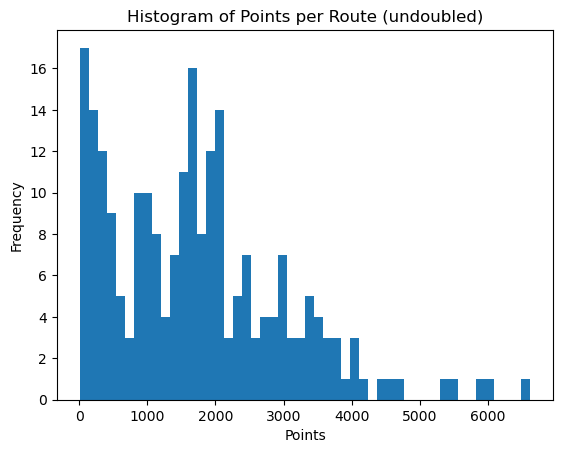

In [95]:
#how many points per route_id (Undoubled)
points_per_route = request_df_driven.groupby('route_id')['route_id'].count()
plt.hist(points_per_route, bins = 50)
plt.title('Histogram of Points per Route (undoubled)')
plt.xlabel('Points')
plt.ylabel('Frequency')

request_df_driven

## Finding clusters

In [96]:
print(np.min(request_df_driven['lat']), np.max(request_df_driven['lat']))
print(np.min(request_df_driven['long']), np.max(request_df_driven['long']))
# no need to scale  (values are between 0 and 1, but you see there's a strong center, zoomed in above. )

0.2214959618917708 0.9186862807351748
0.0 0.6076240817820451


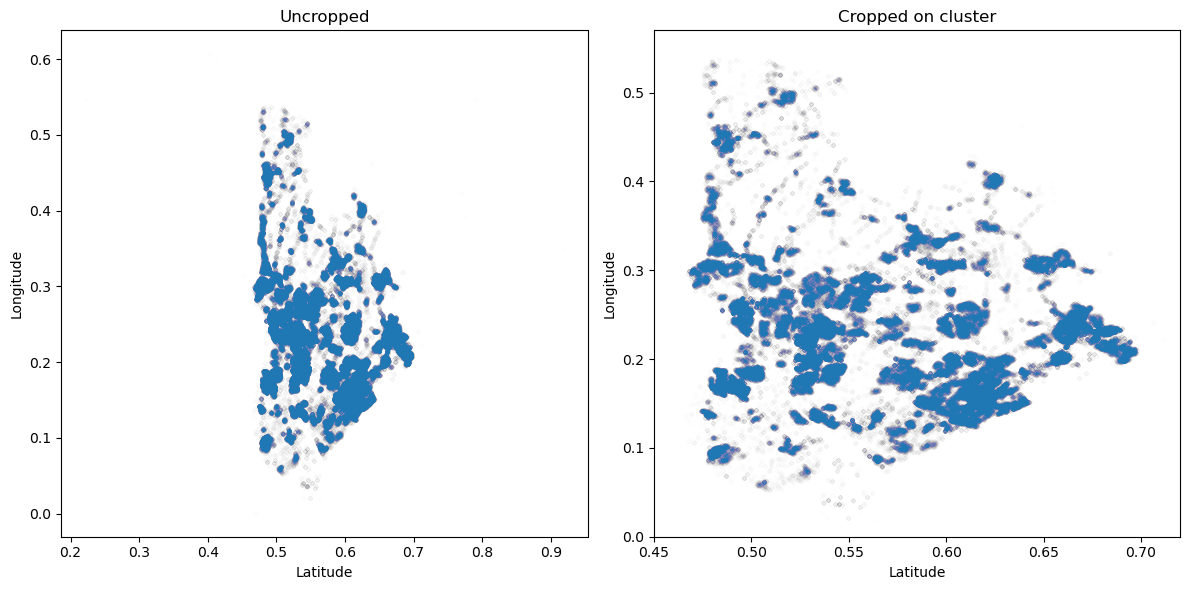

In [97]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].scatter(x=request_df_driven['lat'], y=request_df_driven['long'], alpha=0.005, marker='.')
axs[0].set_title('Uncropped')
axs[0].set_xlabel('Latitude')
axs[0].set_ylabel('Longitude')
axs[1].scatter(x=request_df_driven['lat'], y=request_df_driven['long'], alpha=0.005, marker='.')
axs[1].set_xlim(0.45, 0.72)
axs[1].set_ylim(0, 0.57)
axs[1].set_title('Cropped on cluster')
axs[1].set_xlabel('Latitude')
axs[1].set_ylabel('Longitude')
plt.tight_layout()

Very high density of the blue dots - we need to add in the calculated is_max values from the server_df to get the actual driven routes in stead of the same coordinate being calculated multiple times. This will decrease density of the markers. Added benefit is that it will reduce computation time as you'll have less points in request_df_driven vs request_df

In [102]:
## Good, now we work with 15.25% of the data
len(request_df_driven)/len(request_df)

0.15204573712410907

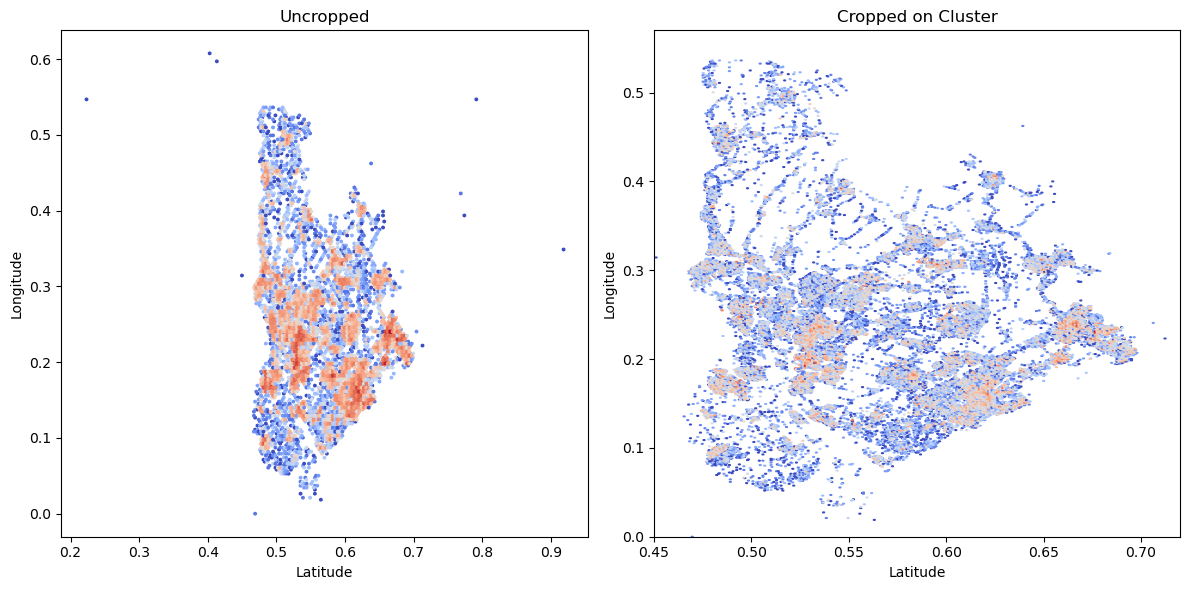

In [99]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Left plot: Uncropped hexbin
axs[0].hexbin(request_df_driven['lat'], request_df_driven['long'], gridsize=200, cmap="coolwarm", bins="log")
axs[0].set_title('Uncropped')
axs[0].set_xlabel('Latitude')
axs[0].set_ylabel('Longitude')
axs[0].grid(False)
# Right plot: Cropped on cluster
axs[1].hexbin(request_df_driven['lat'], request_df_driven['long'], gridsize=750, cmap="coolwarm", bins="log")
axs[1].set_xlim(0.45, 0.72) 
axs[1].set_ylim(0, 0.57)
axs[1].set_title('Cropped on Cluster')
axs[1].set_xlabel('Latitude')
axs[1].set_ylabel('Longitude')
axs[1].grid(False)
# Adjust layout
plt.tight_layout()

Text(0.5, 1.0, 'DBSCAN Clustering of Coordinates')

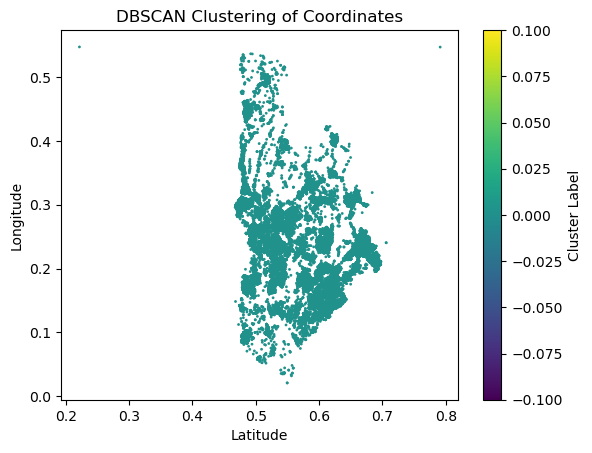

In [104]:
#sampled_df required for memory footprint

sampled_driven = request_df_driven.sample(frac=0.1)
coordinates = sampled_driven[['lat', 'long']].values
#no need to scale - values are already between 0 and 1
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(coordinates)
sampled_driven['cluster'] = clusters
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
plt.scatter(sampled_driven['lat'], sampled_driven['long'], c=sampled_driven['cluster'], cmap='viridis', s=1)
plt.colorbar(label='Cluster Label')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('DBSCAN Clustering of Coordinates')
